In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import statistics

from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RANSACRegressor,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import seaborn
from IPython.display import Image

In [2]:
data=pd.read_csv('./Concrete_Data.csv')
print(len(data))
data.head()

1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 重命名列
data.columns = ['cement_component','furnace_slag','flay_ash',
                'water_components','superplasticizer',\
               'coarse_aggregate','fine_aggregate','age','concrete_strength']

data.head()

,cement_component,furnace_slag,flay_ash,water_components,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


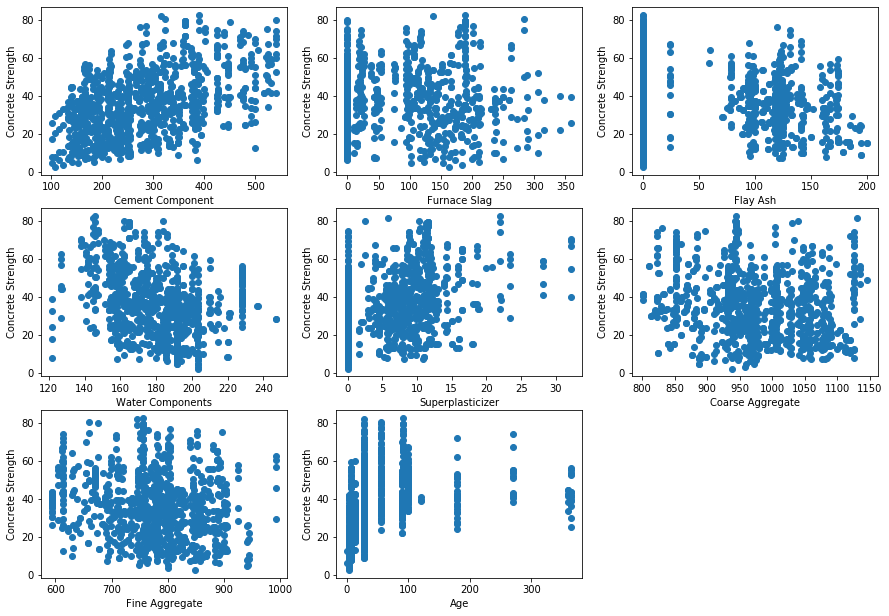

In [4]:
# 绘制相应变量和探索变量之间的散点图

plt.figure(figsize=(15,10.5))
plot_count=1

for feature in list(data.columns)[:-1]:
    plt.subplot(3,3,plot_count)
    plt.scatter(data[feature],data['concrete_strength'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete Strength')
    plot_count+=1
    
plt.show()

<font size = 5>
    
    
我们通过使用子图在同一幅图中绘制出了多个图块。我们首先通过plt.figure(figsize=(15,10.5))来定义图形大小。这将图形固定位宽度15和高度10.5.响应变量（即混凝土强度）对所有图块保持不变，而探索变量一次只对应一个（即一块连着一块）。因此我们使用for list（data.columns）[:-1]中的特征，遍历除了最后一个变量即响应变量之外的所有变量。然后我们定义了subplot索引：plt.subplot(3,3,plot_count).第一个三定义了行数，第二个三定义了列数。这意味着这个图形最多可以容纳9个图块。plot_count定义了特定图块在图形上的位置。在这种情况下，可能值可以从1-9

## 计算承兑pearson相关性

In [15]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_components  superplasticizer  \
cement_component              1.000        -0.275    -0.397            -0.082             0.092   
furnace_slag                 -0.275         1.000    -0.324             0.107             0.043   
flay_ash                     -0.397        -0.324     1.000            -0.257             0.378   
water_components             -0.082         0.107    -0.257             1.000            -0.658   
superplasticizer              0.092         0.043     0.378            -0.658             1.000   
coarse_aggregate             -0.109        -0.284    -0.010            -0.182            -0.266   
fine_aggregate               -0.223        -0.282     0.079            -0.451             0.223   
age                           0.082        -0.044    -0.154             0.278            -0.193   
concrete_strength             0.498         0.135    -0.106            -0.290             0.366   

         

## 计算所有特征之间的配对图

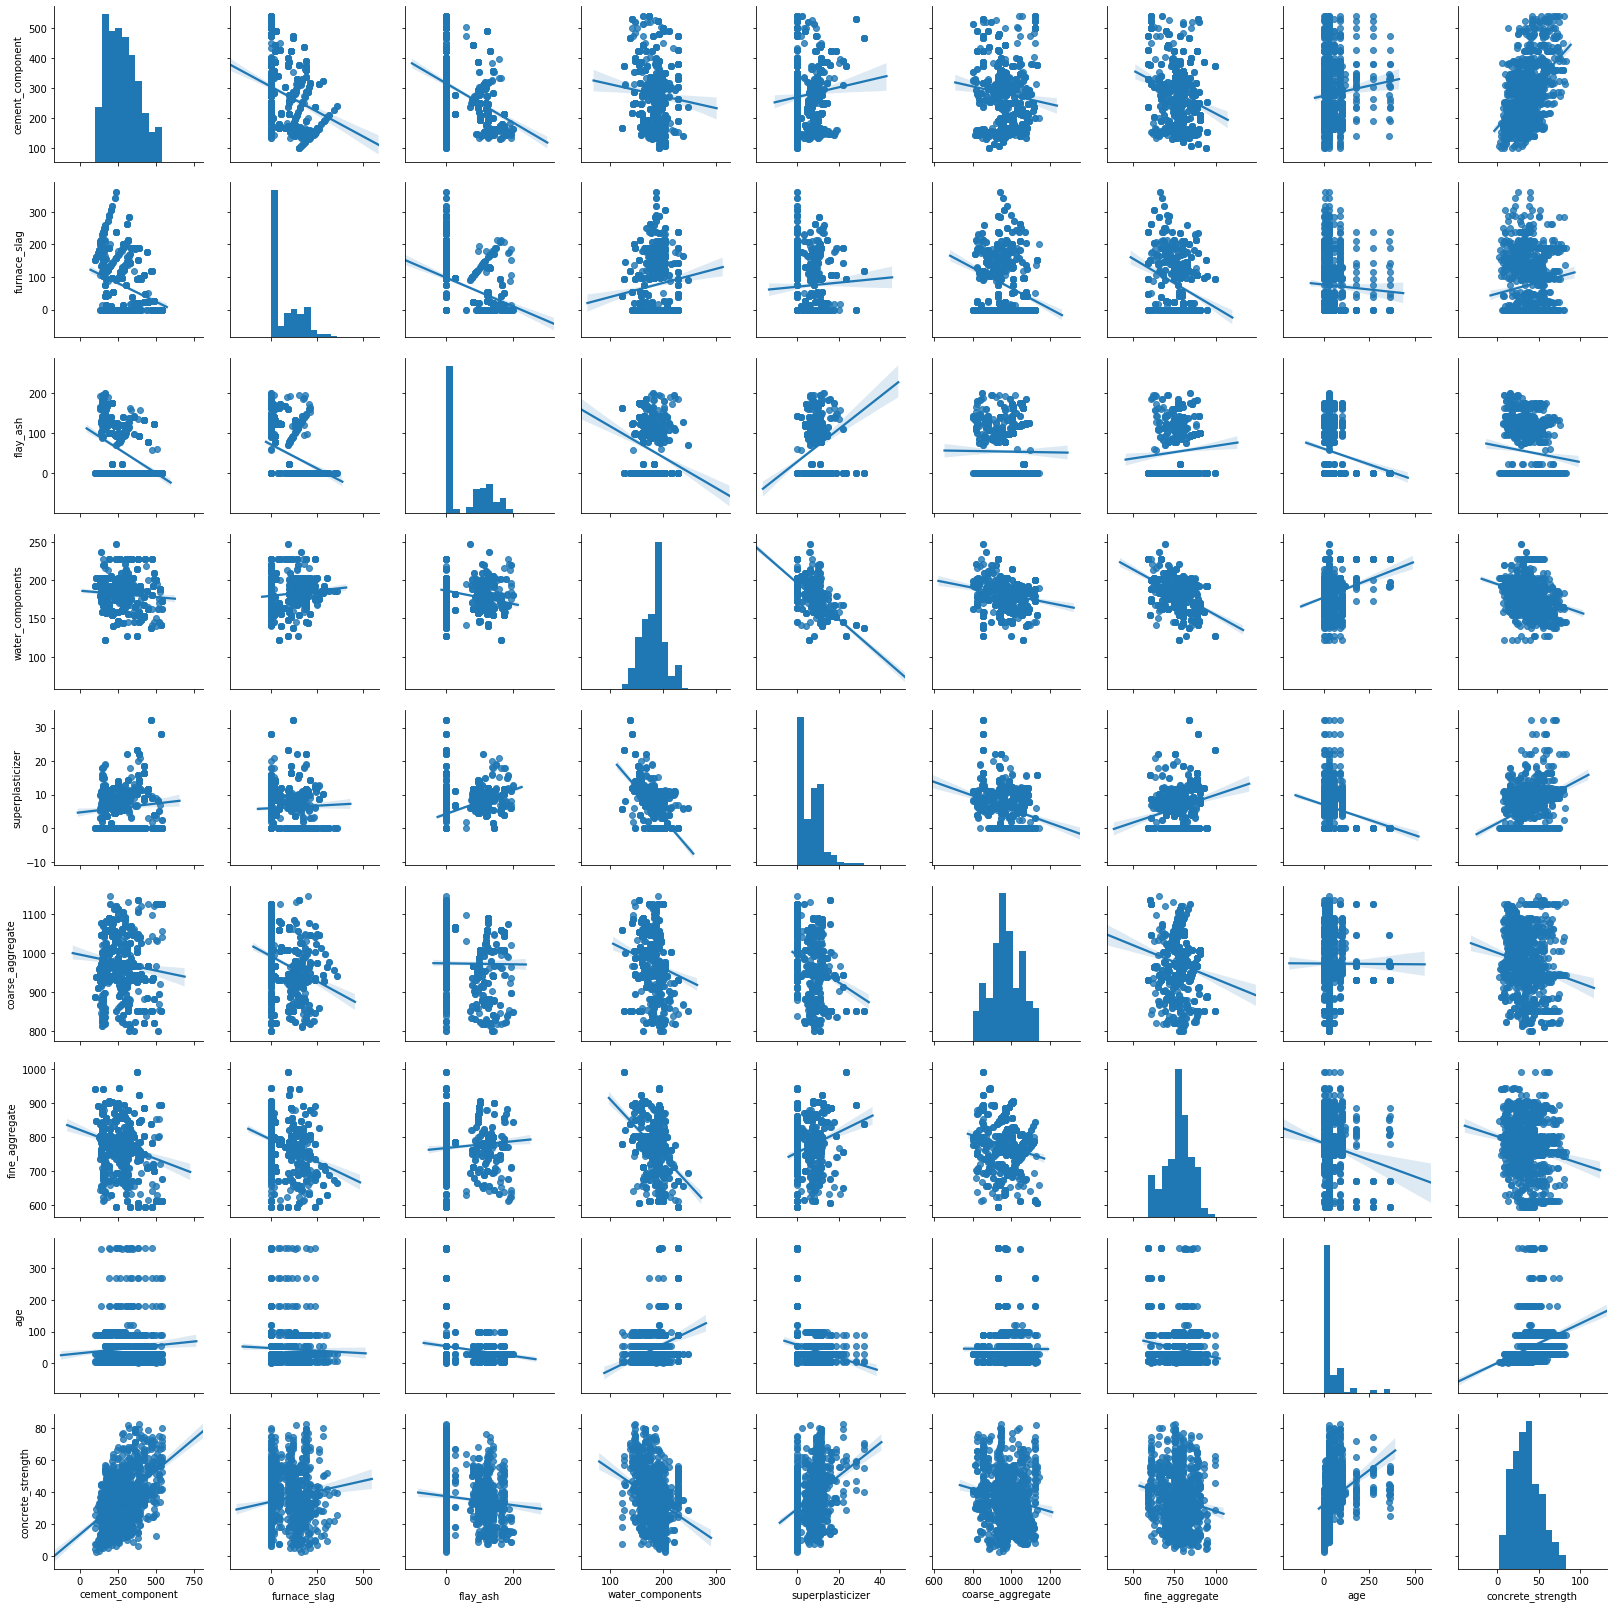

In [6]:
# 下面这行代码表示删除值为0的列中的记录。
data_ = data[(data.T != 0).any()]
# 绘制数据集中所有特征之间的相关性
seaborn.pairplot(data_, vars = data.columns, kind='reg')
plt.show()

<font size=5>

## 练习：
1. 从数据特征中删除0，然后重新计算Pearson相关性。相关系数有什么改进？
2. 确定数据集中的Spearman相关性。这是否会在相关性得分上带来任何辩解差异？
3. 从散点图来看，龄期（Age）似乎更像是离散的特征。诸葛采集数据，并计算其余特征的Pearson相关性。特定龄期是否在响应变量和探索变量之间产生了良好的相关性？

In [12]:
data_ = data[(data.T!=0).any()]
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data_.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_components  superplasticizer  \
cement_component              1.000        -0.275    -0.397            -0.082             0.092   
furnace_slag                 -0.275         1.000    -0.324             0.107             0.043   
flay_ash                     -0.397        -0.324     1.000            -0.257             0.378   
water_components             -0.082         0.107    -0.257             1.000            -0.658   
superplasticizer              0.092         0.043     0.378            -0.658             1.000   
coarse_aggregate             -0.109        -0.284    -0.010            -0.182            -0.266   
fine_aggregate               -0.223        -0.282     0.079            -0.451             0.223   
age                           0.082        -0.044    -0.154             0.278            -0.193   
concrete_strength             0.498         0.135    -0.106            -0.290             0.366   

         

In [13]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_components  superplasticizer  \
cement_component              1.000        -0.275    -0.397            -0.082             0.092   
furnace_slag                 -0.275         1.000    -0.324             0.107             0.043   
flay_ash                     -0.397        -0.324     1.000            -0.257             0.378   
water_components             -0.082         0.107    -0.257             1.000            -0.658   
superplasticizer              0.092         0.043     0.378            -0.658             1.000   
coarse_aggregate             -0.109        -0.284    -0.010            -0.182            -0.266   
fine_aggregate               -0.223        -0.282     0.079            -0.451             0.223   
age                           0.082        -0.044    -0.154             0.278            -0.193   
concrete_strength             0.498         0.135    -0.106            -0.290             0.366   

         

In [14]:
data_ = data[(data.T!=0).any()]
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data_.corr(method='spearman')
print(correlations)

                   cement_component  furnace_slag  flay_ash  water_components  superplasticizer  \
cement_component              1.000        -0.245    -0.418            -0.094             0.038   
furnace_slag                 -0.245         1.000    -0.254             0.053             0.098   
flay_ash                     -0.418        -0.254     1.000            -0.283             0.454   
water_components             -0.094         0.053    -0.283             1.000            -0.687   
superplasticizer              0.038         0.098     0.454            -0.687             1.000   
coarse_aggregate             -0.145        -0.349     0.058            -0.218            -0.199   
fine_aggregate               -0.174        -0.302     0.051            -0.346             0.168   
age                           0.005        -0.018     0.003             0.091            -0.010   
concrete_strength             0.478         0.164    -0.078            -0.308             0.348   

         